# Assignment 2
## Digdarshan Kunwar, Eaindra Wun Pyae

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from skimage import io
from PIL import Image
plt.rcParams["figure.figsize"] = (25,5)
import time

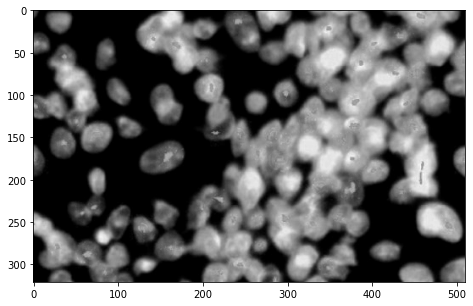

In [75]:
filepath = "../input/nucleus.png"
image = io.imread(filepath, as_gray=True)
image = image/np.max(image) * 255
image = image.astype(np.uint8)
plt.imshow(image, cmap='gray', vmin=0)

In [43]:
# global for filtering
BALANCE_ALPHA = 0.2

def get_median(filter_area):
    res = np.median(filter_area)
    return res

def median_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            # 3 x 3 kernel
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            image[row][column] = get_median(filter_area)
    return image

def get_kernel():
    return np.ones((3, 3), np.float32) / 9


def get_mean_with_kernel(filter_area, kernel):
    return np.sum(np.multiply(kernel, filter_area))

def mean_filter(image, height, width):
    # Set the kernel.
    kernel = get_kernel()

    for row in range(1, height + 1):
        for column in range(1, width + 1):
            # Get the area to be filtered with range indexing.
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            res = get_mean_with_kernel(filter_area, kernel)
            image[row][column] = res

    return image

def mean_median_balanced_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            mean_filter_vector = get_mean_with_kernel(filter_area, get_kernel())
            median_filter_vector = get_median(filter_area)
            image[row][column] = BALANCE_ALPHA * mean_filter_vector + (1 - BALANCE_ALPHA) * median_filter_vector
    return image

def filter_image(image, image_name, filter_name, filtering_function):
    # Get the image size for the kernel looping.
    height, width = image.shape[:2]
    # Add 1px reflected padding to allow kernels to work properly.
    image = np.pad(image, 1, mode='edge')
    print("Calculating %s for %s" % (filter_name, image_name))
    start_time = time.time()
    res = filtering_function(image, height, width)
    print("Successfully calculated %s for %s in %s seconds." %
          (filter_name, image_name, str(time.time() - start_time)))
    return res

In [44]:
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1
print(test_img)
print(test_img[1-1:1+2,1-1:1+2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


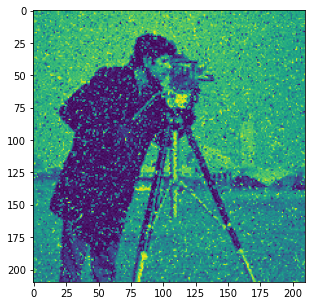

In [45]:


image = io.imread('../input/cameraman.jpg', as_gray=True)
plt.imshow(image)

image_name= "10"

Calculating median filter for 10
Successfully calculated median filter for 10 in 2.1854631900787354 seconds.
Calculating median filter for 10
Successfully calculated median filter for 10 in 1.080199956893921 seconds.


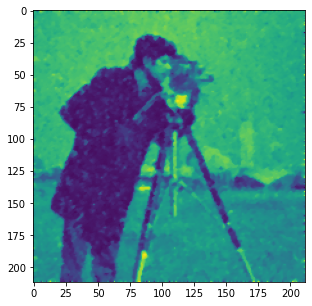

In [48]:
filtered_image = filter_image(image, image_name, 'median filter', mean_median_balanced_filter)
filtered_image_median = filter_image(image, image_name, 'median filter', median_filter)
plt.imshow(filtered_image)

# output_image('Median filtered Image: %s' % image_name, '%s_median.jpg' % image_name, filtered_image)

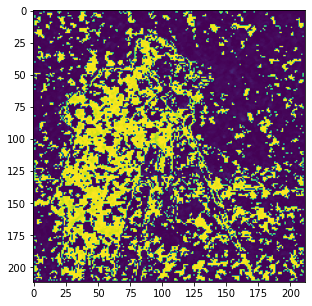

In [50]:
plt.imshow(filtered_image_median - filtered_image)